In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('globallandtemperaturesbycity.csv')
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [23]:
hd = data.dropna(subset=['AverageTemperature'])
hd = hd.drop_duplicates()
hd = hd.reset_index(drop=True)
hd

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8235077,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8235078,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8235079,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8235080,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [27]:
hd['dt'] = pd.to_datetime(hd['dt'])
hd['Year'] = hd['dt'].dt.year
avg_temp = hd.groupby('Year')['AverageTemperature'].mean()
hd

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
2,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
3,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
4,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8235077,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8235078,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8235079,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8235080,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


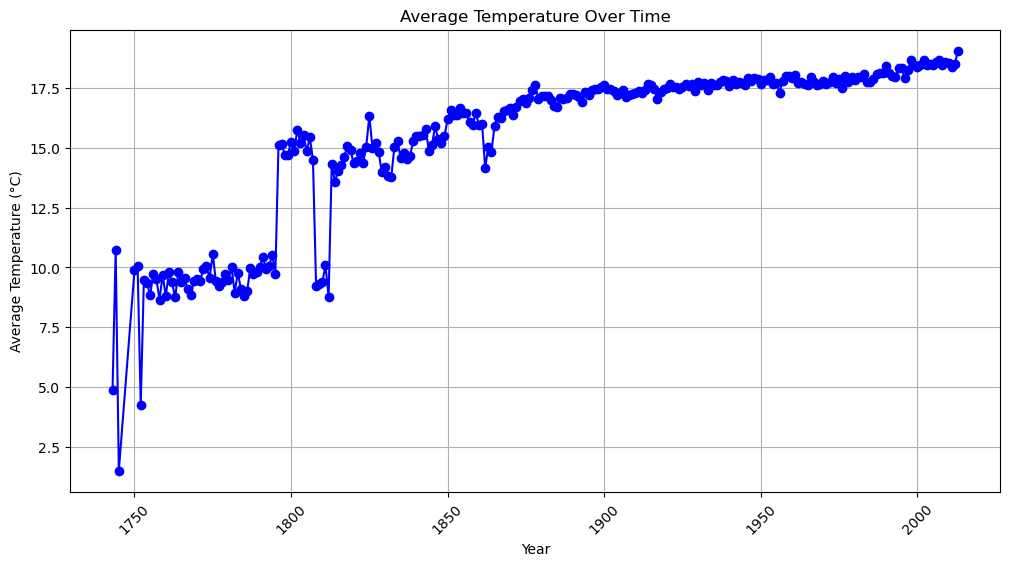

In [33]:
#LinePlot year vs avg temp
plt.figure(figsize=(12, 6))
plt.plot(avg_temp.index, avg_temp.values, marker='o', linestyle='-', color='b')
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

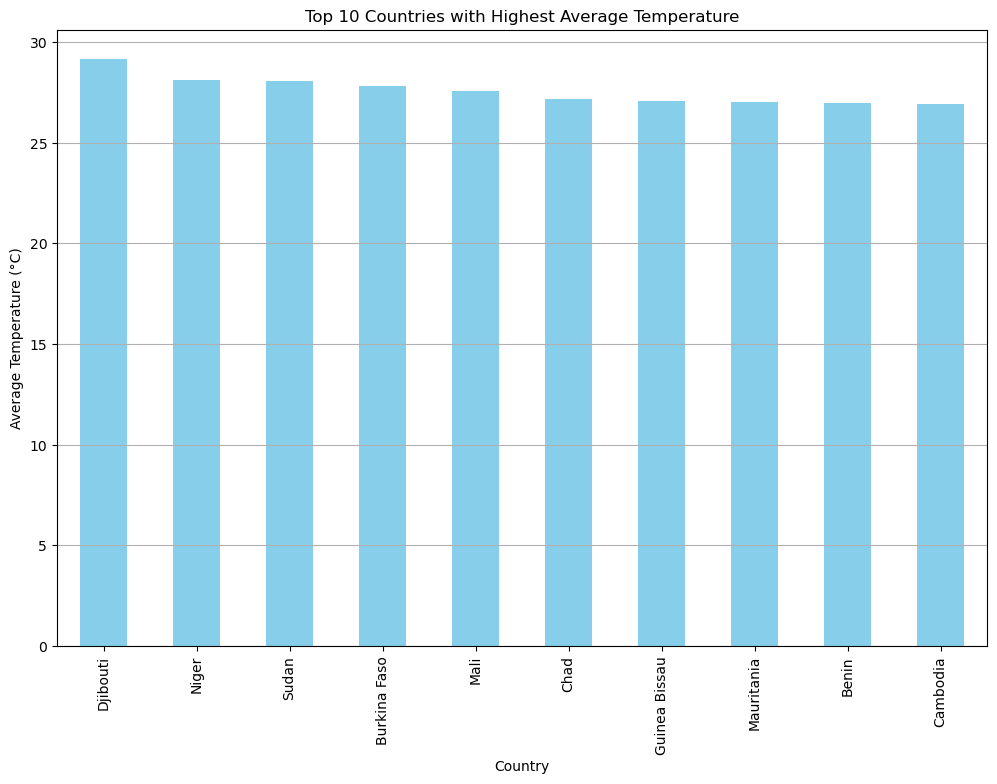

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

avg_temp_per_country = hd.groupby('Country')['AverageTemperature'].mean()
avg_temp_per_country_sorted = avg_temp_per_country.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_temp_per_country_sorted.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Average Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()


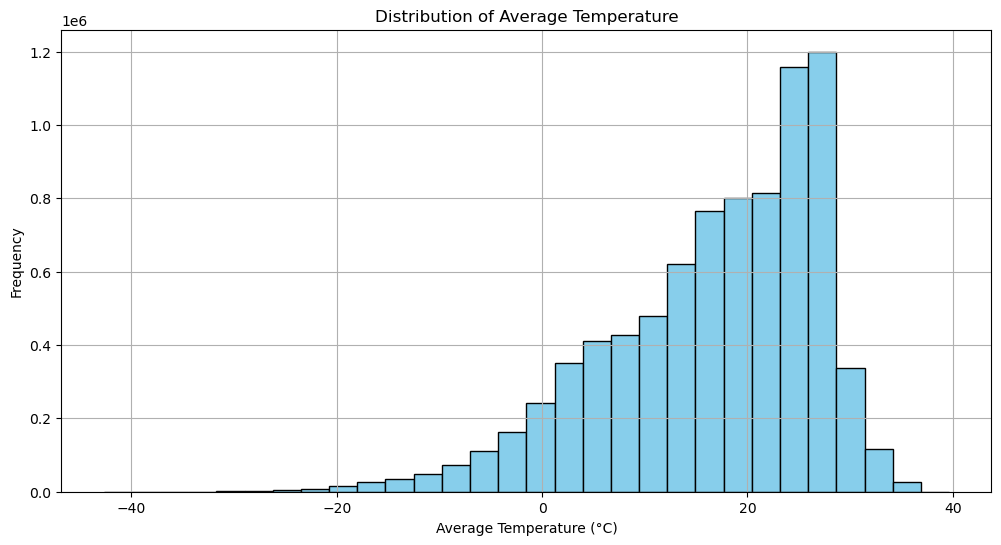

In [55]:

temperature_data = hd['AverageTemperature']

# histogram
plt.figure(figsize=(12, 6))
plt.hist(temperature_data, bins=30, color='skyblue', edgecolor='black') 
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


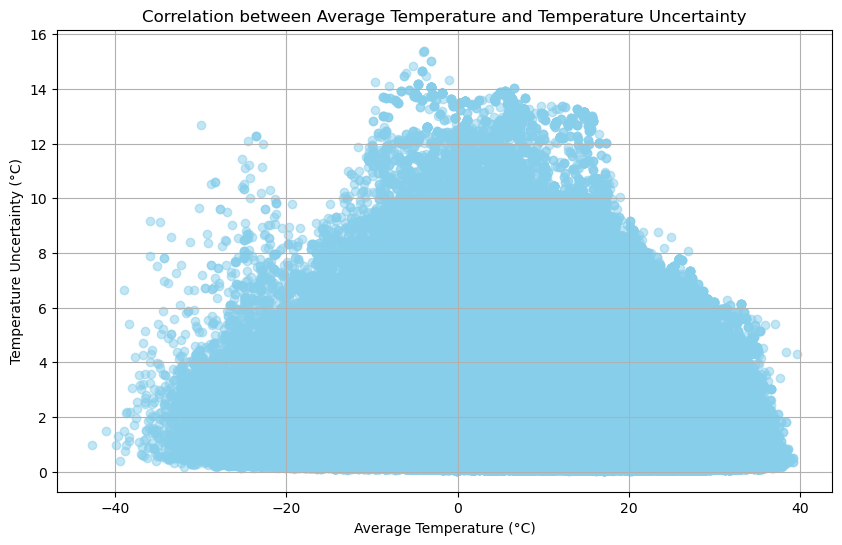

In [67]:

x = hd['AverageTemperature']
y = hd['AverageTemperatureUncertainty']

#  scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='skyblue', alpha=0.5)
plt.title('Correlation between Average Temperature and Temperature Uncertainty')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Temperature Uncertainty (°C)')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

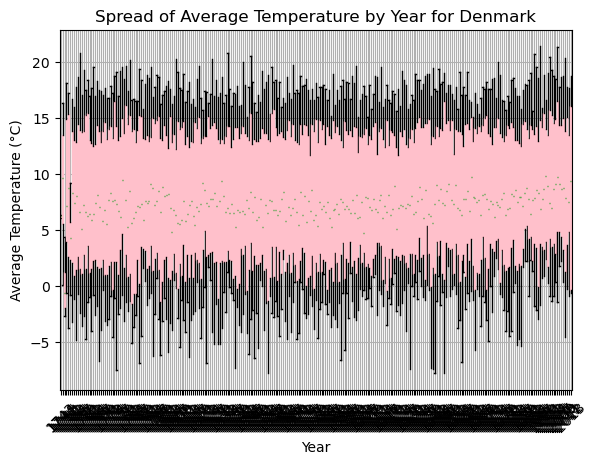

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

country_data = hd[hd['Country'] == 'Denmark'].copy()  


country_data.loc[:, 'dt'] = pd.to_datetime(country_data['dt'])

country_data.loc[:, 'Year'] = country_data['dt'].dt.year

# the box plot
plt.figure(figsize=(12, 6))
country_data.boxplot(column='AverageTemperature', by='Year', grid=True, patch_artist=True, 
                     boxprops=dict(facecolor='yellow', color='pink'),
                     whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Spread of Average Temperature by Year for Denmark')
plt.suptitle('') 
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()
